##### Import Dependences

In [3]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(40)
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('ggplot')

##### Read in CSV and Clean File

In [4]:
df = pd.read_csv("data/Exoplanet.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [6]:
df["koi_disposition"].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

#### Filter Out 'Err' Columns

In [7]:
df_final = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
            'koi_period', 'koi_time0bk','koi_impact','koi_duration','koi_depth','koi_prad',
            'koi_teq','koi_insol','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_slogg',
             'koi_srad','ra','dec','koi_kepmag']]
df_final.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,...,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


#### Explore Dataset

In [9]:
df.shape

(6991, 41)

#### Establish Values

In [15]:
X = df_final.drop("koi_disposition", axis=1)
y = df_final["koi_disposition"].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(6991, 20)
(6991, 1)


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not [['CONFIRMED']
 ['FALSE POSITIVE']
 ['FALSE POSITIVE']
 ...
 ['CANDIDATE']
 ['FALSE POSITIVE']
 ['FALSE POSITIVE']].

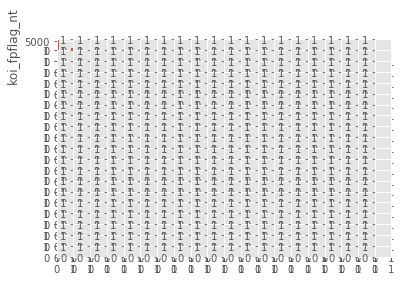

In [17]:
_ = pd.plotting.scatter_matrix(df_final, c = y, s=150, marker ='D')

##### Create DF w/ Dummy Values for Non-Integers

##### Test_Train_Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

#### Logistic Regression Model (Not ideal w/ more than binary options for Exo-Planets)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model.fit(X_train, y_train)

C:\Users\17203\Anaconda3\envs\DVG\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
score = model.score(X, y)
print(f"R2 Score: {score}")

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

R2 Score: 0.5900443427263624
Training Data Score: 0.5897386992180049
Testing Data Score: 0.5909610983981693


In [11]:
predictions = model.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predict_df.head(5)

,Prediction,Actual
1981,FALSE POSITIVE,CANDIDATE
5609,FALSE POSITIVE,FALSE POSITIVE
532,FALSE POSITIVE,FALSE POSITIVE
6558,FALSE POSITIVE,CANDIDATE
1249,CANDIDATE,FALSE POSITIVE
